In [1]:
import pyspark.pandas as ps

In [2]:
path = '' + 'covid_confirmed_usafacts.csv'

In [3]:
cases = ps.read_csv(path)

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/04/28 21:04:10 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/04/28 21:04:11 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [4]:
filtered_cases = cases[cases['State'] == 'CA']

In [5]:
state_filter_df = filtered_cases.drop(['countyFIPS','StateFIPS','State'])
state_filter_df = state_filter_df.set_index('County Name')

In [6]:
def get_start(list_of_dates):
    start = list_of_dates[0]
    for i in list_of_dates:
        if i.day_name() == 'Sunday':
            start = i
            break
    return start

In [7]:
def get_end(list_of_dates):
    end = list_of_dates[-1]
    for j in list_of_dates[::-1]:
        if j.day_name() == 'Saturday':
            end = j
            break
    return end

In [8]:
def filter_dates(df):
    dates = ps.to_datetime(df.columns)
    start = get_start(dates)
    end = get_end(dates)
    start = str(start).split(' ')[0]
    end = str(end).split(' ')[0]
    df = df.loc[:,start:end]
    return df

In [9]:
ca_Cases = filter_dates(state_filter_df)

In [10]:
date = []
date_cols = ca_Cases.columns
for i in range(0, len(date_cols),7):
    date.append(date_cols[i])

In [11]:
transpose_df = ca_Cases.T
state_filter_df = transpose_df.diff()


22/04/28 21:04:39 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
/Users/aakashjoshi/opt/anaconda3/lib/python3.9/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series


In [12]:
state_filter_df = state_filter_df.reset_index()

In [13]:
state_filter_df = state_filter_df.drop(columns=['index'])

In [14]:
rows = len(state_filter_df.index)
week = []
for val in range(0,rows):
    val = val//7
    week.append(val)

In [15]:
state_filter_df.insert(0,'Weeks',week)

In [16]:
state_filter_df = state_filter_df.sort_index()
state_filter_df = state_filter_df.groupby('Weeks').sum()
state_filter_df = state_filter_df.sort_index()

In [17]:
state_filter_df = state_filter_df.T

22/04/28 21:05:02 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/04/28 21:05:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [18]:
state_filter_df.columns = date

In [19]:
state_filter_df = state_filter_df.reset_index()

#### PySpark DF

In [20]:
state_filter_df

22/04/28 21:05:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/04/28 21:05:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


County Name  2020-01-26  2020-02-02  2020-02-09  2020-02-16  2020-02-23  2020-03-01  2020-03-08  2020-03-15  2020-03-22  2020-03-29  2020-04-05  2020-04-12  2020-04-19  2020-04-26  2020-05-03  2020-05-10  2020-05-17  2020-05-24  2020-05-31  2020-06-07  2020-06-14  2020-06-21  2020-06-28  2020-07-05  2020-07-12  2020-07-19  2020-07-26  2020-08-02  2020-08-09  2020-08-16  2020-08-23  2020-08-30  2020-09-06  2020-09-13  2020-09-20  2020-09-27  2020-10-04  2020-10-11  2020-10-18  2020-10-25  2020-11-01  2020-11-08  2020-11-15  2020-11-22  2020-11-29  2020-12-06  2020-12-13  2020-12-20  2020-12-27  2021-01-03  2021-01-10  2021-01-17  2021-01-24  2021-01-31  2021-02-07  2021-02-14  2021-02-21  2021-02-28  2021-03-07  2021-03-14  2021-03-21  2021-03-28  2021-04-04  2021-04-11  2021-04-18  2021-04-25  2021-05-02  2021-05-09  2021-05-16  2021-05-23  2021-05-30  2021-06-06  2021-06-13  2021-06-20  2021-06-27  2021-07-04  2021-07-11  2021-07-18  2021-07-25  2021-08-01  2021-08-08  2021-08-15  2021-08-22  2021-08-29  2021-09-05  2021-09-12  2021-09-19  2021-09-26  2021-10-03  2021-10-10  2021-10-17  2021-10-24  2021-10-31  2021-11-07  2021-11-14  2021-11-21  2021-11-28  2021-12-05  2021-12-12  2021-12-19  2021-12-26  2022-01-02  2022-01-09  2022-01-16  2022-01-23  2022-01-30  2022-02-06  2022-02-13  2022-02-20  2022-02-27  2022-03-06  2022-03-13  2022-03-20  2022-03-27
0              Statewide Unallocated           0           0           0           0           0          21           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0          95         265        -315         -36          28         -21          -2          10           0           0         -35           0           0           0           0           0           0           0           0           0           1           0           0           0           0           1           1           1          10          10         328        1526        -129        -166         250         273         203       -2064         -14         592          65         532       -1430         898         121       -1019         787        -123         820        6899        6651       22796      -26933       -2624       13426      -16731        -131        -237        -412          89         114        -195          13
1                    Alameda County            3          -5           1           5           5          25         134         204         207         265         257         292         281         352         328         424         465         533         466         630         774        1012        1247        1571        1613        1439        1345        1319        1478        1187        1063         777         554         648         517         489         526         532         603         735        1091        1459        2074        2346        4410        5242        5600        4535        5753        6661        5104        3615        2767        2235        1653        1097         935         772         661         570         620         621         673         690         656         560         500         382         341         283         225         299         310         411         596        1089        1684        2215        2592        2331        2245        2303        2961        1898        2568        1489        1155        1154         926         784         804         802         870         744         816         580        1022         965   

#### Repartitioning to 1 

In [21]:
temp = state_filter_df.to_spark()
temp = temp.coalesce(1)
temp.show()
# temp.write.csv(path='s3://bdaassignment/output/', header = True, mode = 'overwrite')

+--------------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------

### AWS CLI

aws emr create-cluster --os-release-label 2.0.20220406.1 --applications Name=Hadoop Name=Hive Name=Pig Name=Hue Name=Spark Name=HBase --ec2-attributes '{"KeyName":"bda-assignment","InstanceProfile":"EMR_EC2_DefaultRole","SubnetId":"subnet-080d5d465b87b5ff4","EmrManagedSlaveSecurityGroup":"sg-00737c5cc8cb57d92","EmrManagedMasterSecurityGroup":"sg-018d6700f2350c9c9"}' --release-label emr-6.6.0 --log-uri 's3n://aws-logs-469528157107-us-west-1/elasticmapreduce/' --steps '[{"Args":["spark-submit","--deploy-mode","client","s3://bdaassignment/main.py"],"Type":"CUSTOM_JAR","ActionOnFailure":"CONTINUE","Jar":"command-runner.jar","Properties":"","Name":"Spark application"},{"Args":["spark-submit","--deploy-mode","client","s3://bdaassignment/main.py"],"Type":"CUSTOM_JAR","ActionOnFailure":"CONTINUE","Jar":"command-runner.jar","Properties":"","Name":"Spark application"}]' --instance-groups '[{"InstanceCount":1,"EbsConfiguration":{"EbsBlockDeviceConfigs":[{"VolumeSpecification":{"SizeInGB":32,"VolumeType":"gp2"},"VolumesPerInstance":2}]},"InstanceGroupType":"MASTER","InstanceType":"m5.xlarge","Name":"Master - 1"},{"InstanceCount":2,"EbsConfiguration":{"EbsBlockDeviceConfigs":[{"VolumeSpecification":{"SizeInGB":32,"VolumeType":"gp2"},"VolumesPerInstance":2}]},"InstanceGroupType":"CORE","InstanceType":"m5.xlarge","Name":"Core - 2"}]' --auto-scaling-role EMR_AutoScaling_DefaultRole --bootstrap-actions '[{"Path":"s3://bdaassignment/dependency/aws-bootstrap.sh","Name":"Custom action"}]' --ebs-root-volume-size 10 --service-role EMR_DefaultRole --enable-debugging --auto-termination-policy '{"IdleTimeout":3600}' --name 'bda' --scale-down-behavior TERMINATE_AT_TASK_COMPLETION --region us-west-1

#### Screenshot

### EMR Cluster

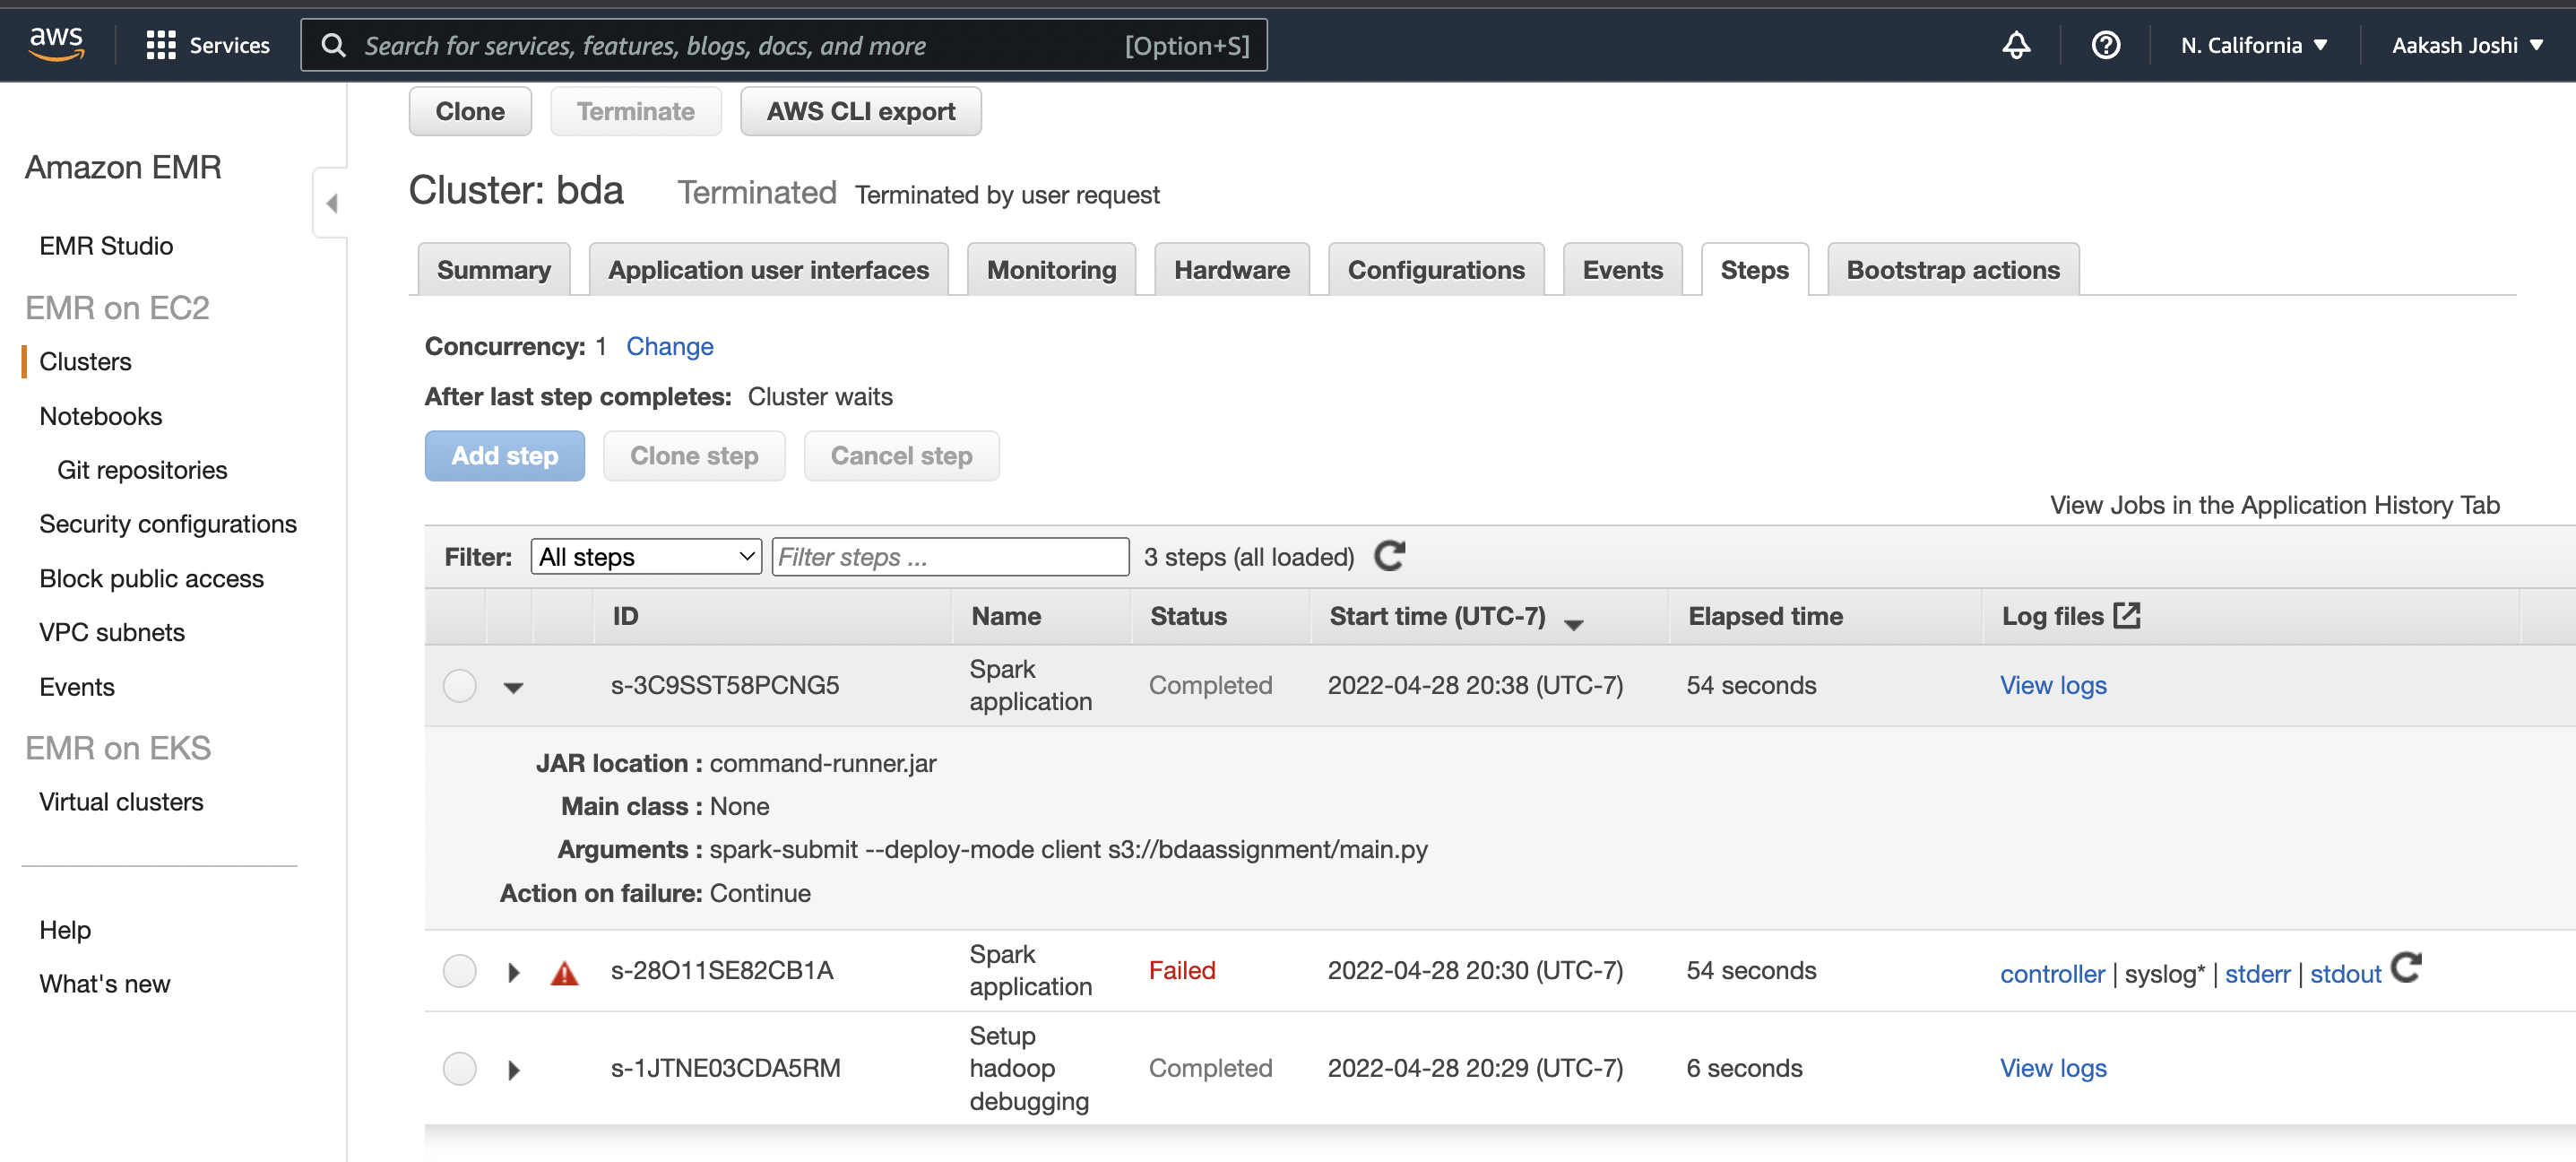

### S3 Bucket

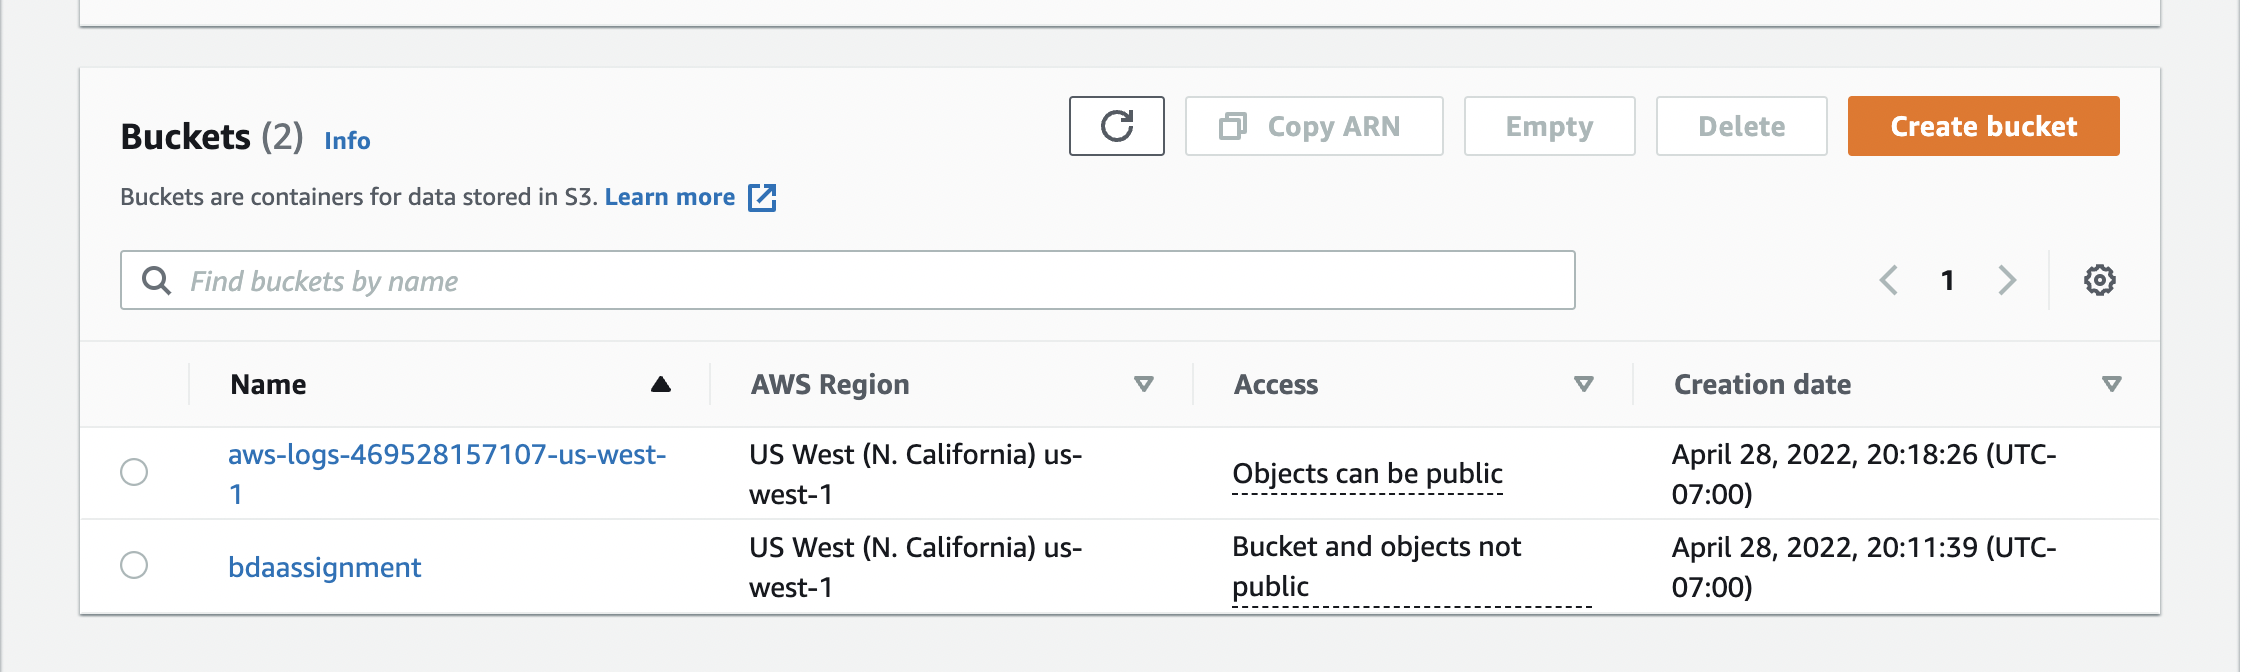

### Inside S3 bucket

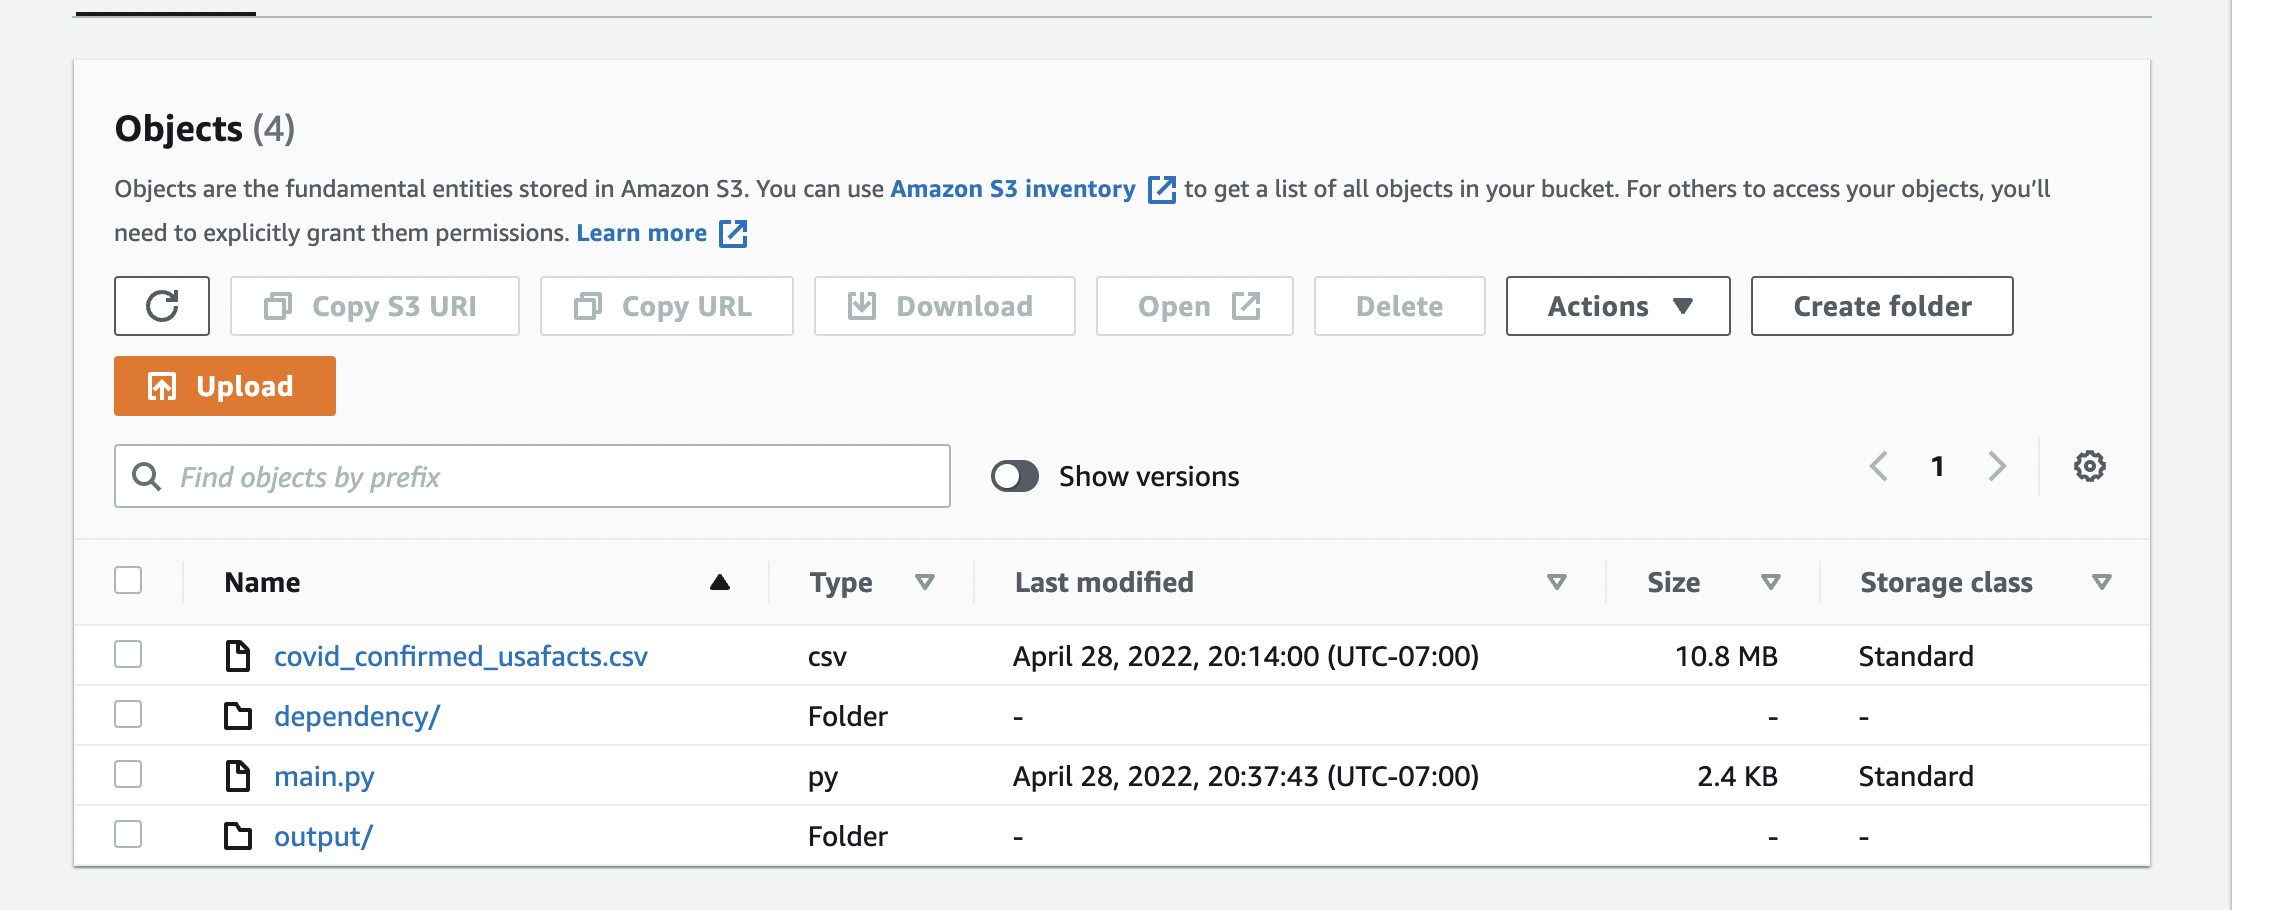

### Output -- CSV getting generated in AWS

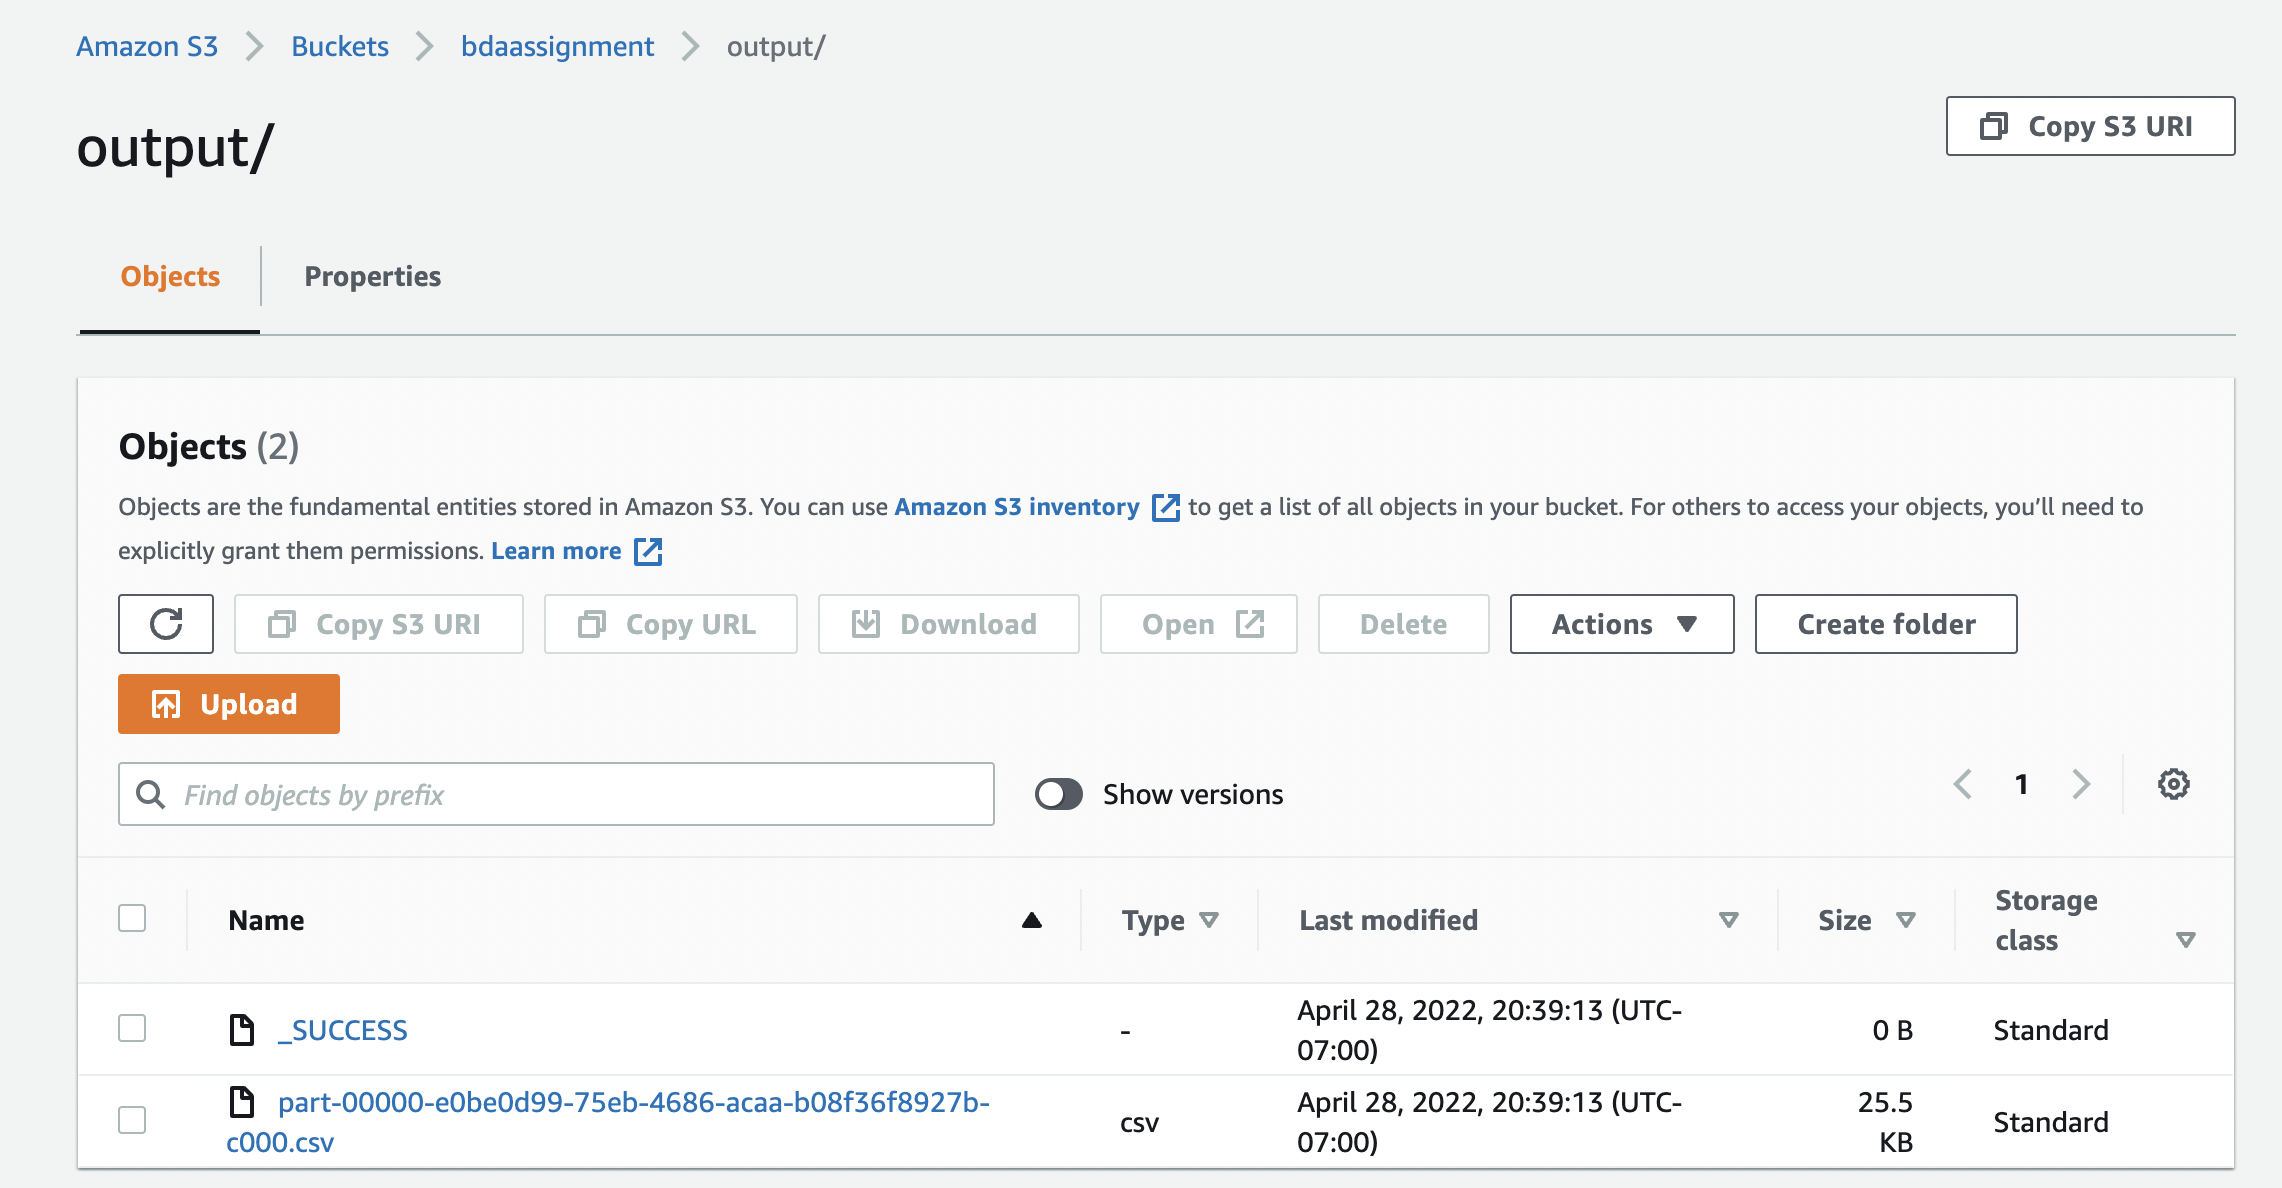

### Bootstraping for AWS setup

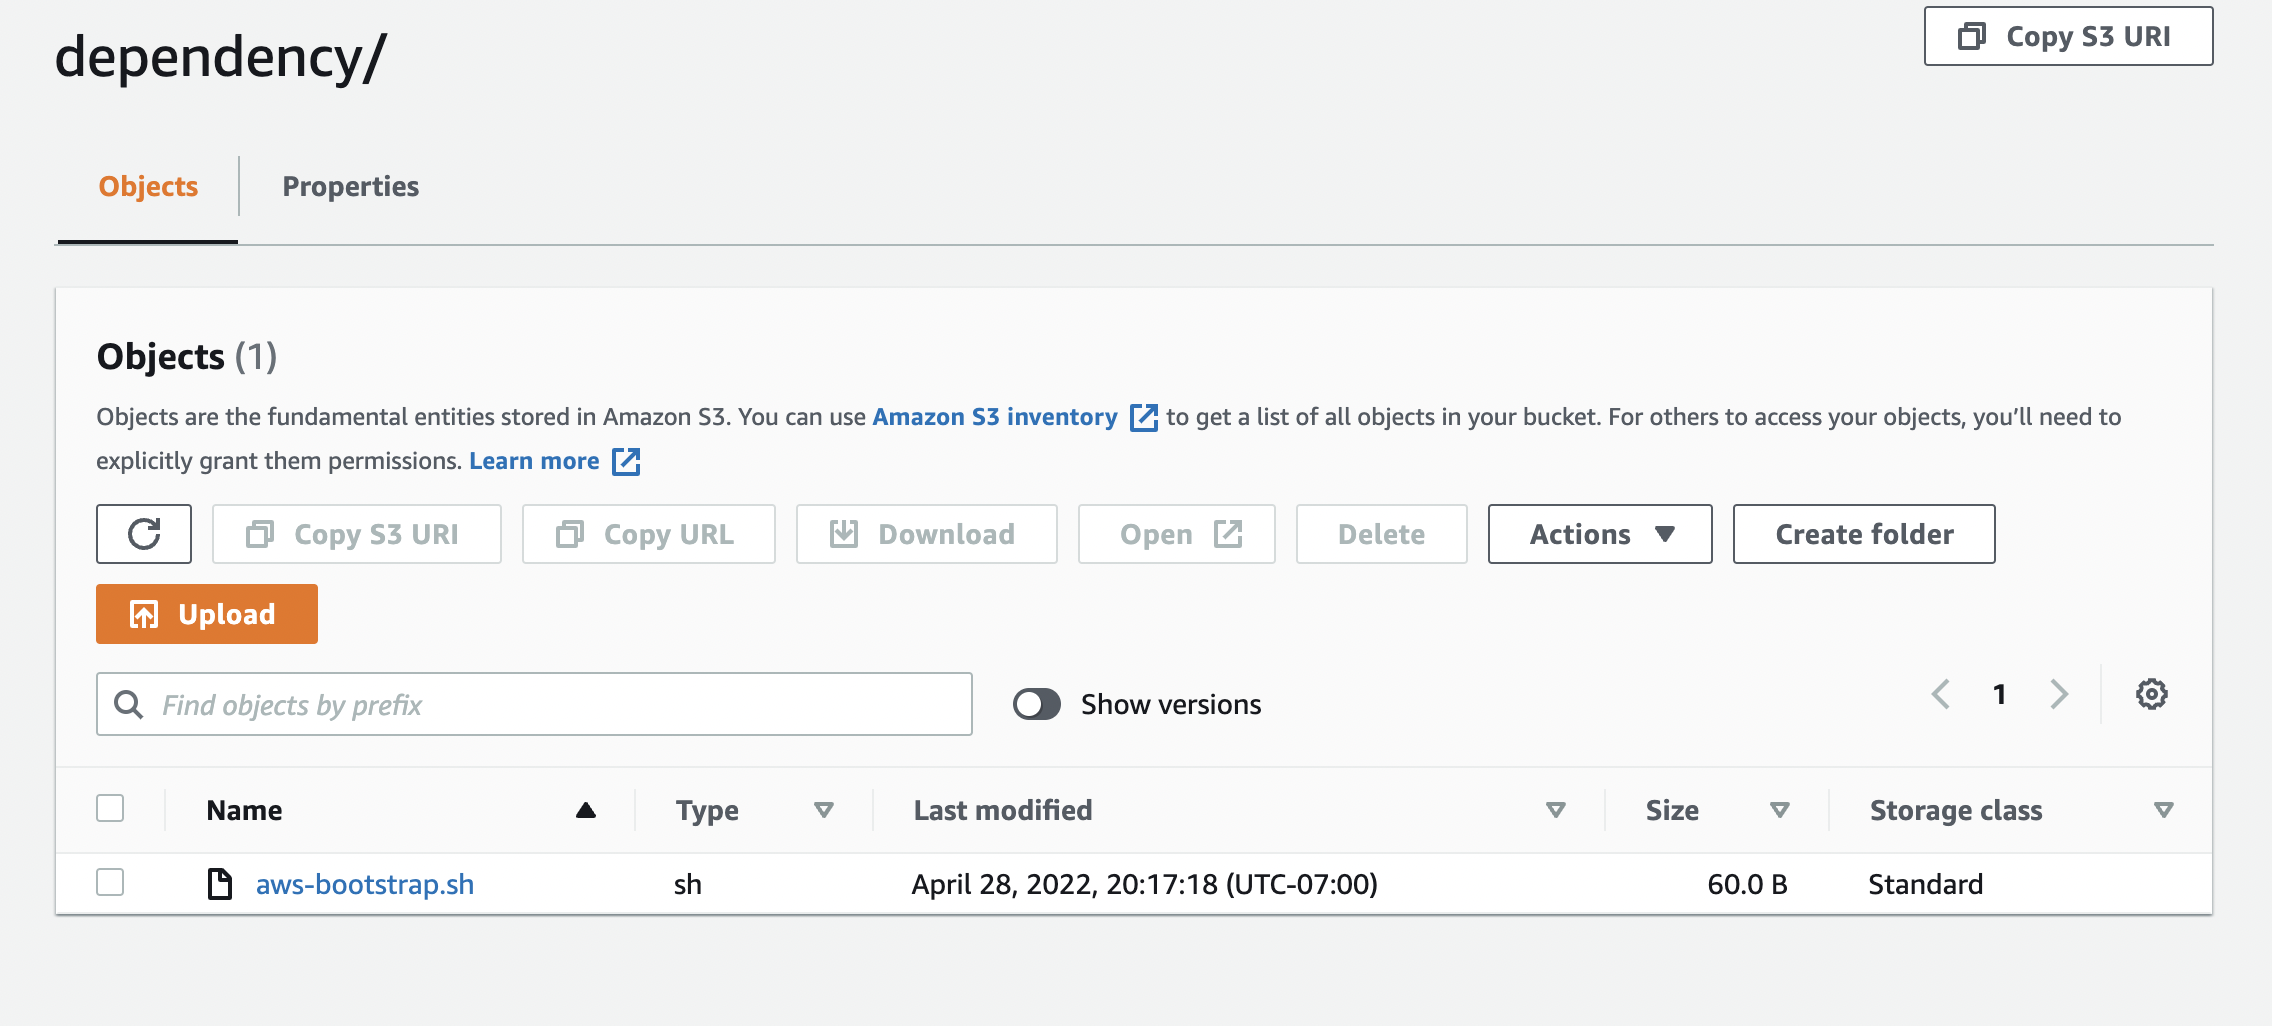